Use background mean / sky brightness in each band, compare the maps, then compare the galaxy number counts as done by Zilong Du.

In [1]:
import healsparse as hsp

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

#import rubin_sim.maf as maf

import healpy as hp

import os


In [23]:
#load common mask
savedir='/global/cscratch1/sd/qhang/DESC_DC2_obs-dr2/'
fname = savedir+'obj_footprint_mask-nside-128.fits'

mask = hp.read_map(fname)

band_list=['u','g','r','i','z','y']

SUPMAP={}
MAFMAP={}

for ii, bb in enumerate(band_list):
    #load the supreme maps:
    supmap_dir = '/global/cfs/projectdirs/lsst/shared/DC2-prod/Run2.2i/addons/supreme/dr6-wfd/'

    fname = supmap_dir+'supreme_dc2_dr6d_v3_%s_airmass_wmean.hs'%bb

    testmap = hsp.HealSparseMap.read(fname)

    rec_hp = testmap.generate_healpix_map(nside=128,nest=False)
    rec_hp[~mask.astype(bool)]=hp.UNSEEN

    #load maf maps:

    OpSim_dir='/global/cscratch1/sd/qhang/minion_1016/MAF-5year/desc_maf/'

    fname=OpSim_dir+'minion_1016_dc2_Median_airmass_%s_and_nightlt1825_HEAL.fits'%bb

    mafmap=hp.read_map(fname)

    mafmap[~mask.astype(bool)]=hp.UNSEEN
    
    SUPMAP[bb]=rec_hp
    MAFMAP[bb]=mafmap

In [4]:
#testmap visualise:

#convert to healpix map or 


HealSparseMap: nside_coverage = 32, nside_sparse = 32768, float64

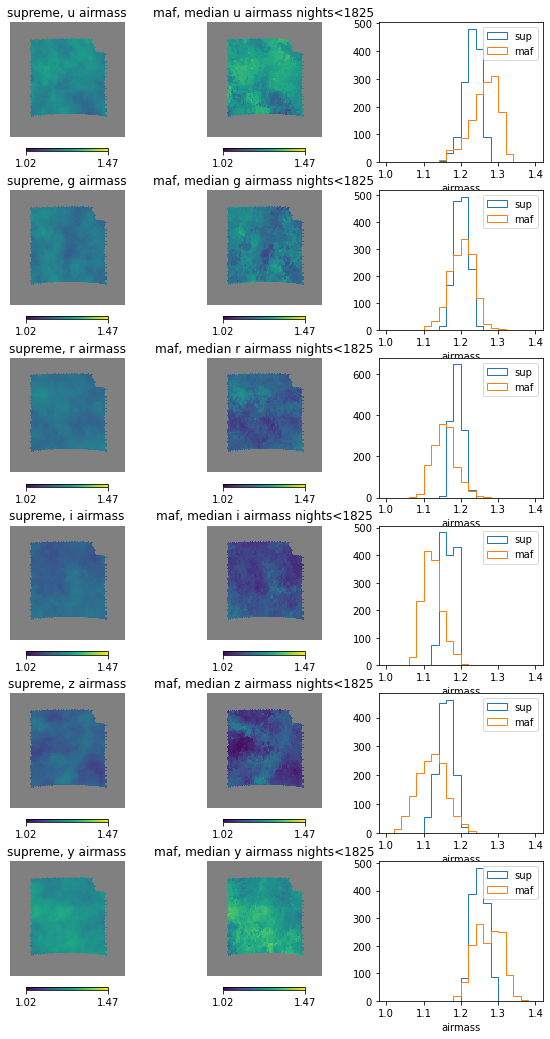

In [29]:
#hp.mollview(rec_hp,nest=True)

fig,axarr=plt.subplots(6,3,figsize=[10,18])

for ii,bb in enumerate(band_list):

    plt.sca(axarr[ii,0])
    title='supreme, %s airmass'%bb
    hp.gnomview(SUPMAP[bb], rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, nest=False,
                max=1.47, min=1.02,
                title=title, hold=True, 
                notext=True)


    title='maf, median %s airmass nights<1825'%bb

    plt.sca(axarr[ii,1])
    hp.gnomview(MAFMAP[bb], rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, nest=False,
                max=1.47, min=1.02,
                title=title, hold=True, 
                notext=True)
    
    #dist
    plt.sca(axarr[ii,2])
    cc=plt.hist(SUPMAP[bb][mask.astype(bool)],bins=20,range=[1,1.4], histtype='step',label='sup')
    cc=plt.hist(MAFMAP[bb][mask.astype(bool)],bins=20,range=[1,1.4], histtype='step',label='maf')
    plt.legend()
    plt.xlabel('airmass')

Nexposure:

In [2]:
#save these maps as healpy

#load common mask
savedir='/global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/'
fname = savedir+'obj_footprint_mask-nside-128.fits'

mask = hp.read_map(fname)

band_list=['u','g','r','i','z','y']

savedir='/global/cscratch1/sd/qhang/minion_1016/MAF-5year/supreme_map/'
for ii, bb in enumerate(band_list):
    #load the supreme maps:
    supmap_dir = '/global/cfs/projectdirs/lsst/shared/DC2-prod/Run2.2i/addons/supreme/dr6-wfd/'

    fname = supmap_dir+'supreme_dc2_dr6d_v3_%s_nexp_sum.hs'%bb

    testmap = hsp.HealSparseMap.read(fname)

    rec_hp = testmap.generate_healpix_map(nside=128,nest=False)
    rec_hp[~mask.astype(bool)]=hp.UNSEEN
    
    savename = savedir + 'supreme_dc2_dr6d_v3_%s_nexp_sum-nside-128.fits'%bb
    hp.write_map(savename, rec_hp)
    print('written: %s'%savename)

setting the output map dtype to [dtype('float64')]


written: /global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/supreme_dc2_dr6d_v3_u_nexp_sum-nside-128.fits


setting the output map dtype to [dtype('float64')]


written: /global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/supreme_dc2_dr6d_v3_g_nexp_sum-nside-128.fits


setting the output map dtype to [dtype('float64')]


written: /global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/supreme_dc2_dr6d_v3_r_nexp_sum-nside-128.fits


setting the output map dtype to [dtype('float64')]


written: /global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/supreme_dc2_dr6d_v3_i_nexp_sum-nside-128.fits


setting the output map dtype to [dtype('float64')]


written: /global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/supreme_dc2_dr6d_v3_z_nexp_sum-nside-128.fits


setting the output map dtype to [dtype('float64')]


written: /global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/supreme_dc2_dr6d_v3_y_nexp_sum-nside-128.fits


A quick look at ebv map and stellar density:

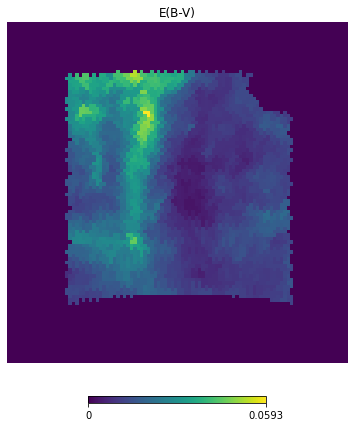

In [12]:
#ebv
inroot = '/global/cscratch1/sd/qhang/other_systematic_maps/'
fname = inroot + 'ebv_ring_rot_512.fits'
mapin = hp.read_map(fname)
mapin = hp.ud_grade(mapin, 128)

mapin = mapin*mask

hp.gnomview(mapin, rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, nest=False,
                title='E(B-V)',
                notext=True)

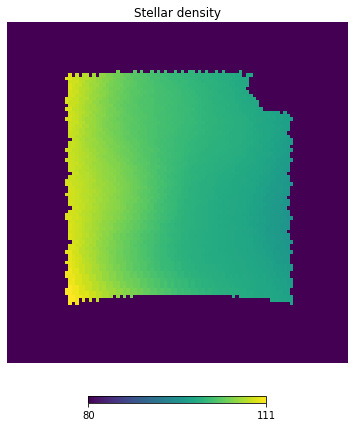

In [18]:
#ebv
inroot = '/global/cscratch1/sd/qhang/other_systematic_maps/'
fname = inroot + 'allwise_total_rot_512.fits'
mapin = hp.read_map(fname)
mapin = hp.ud_grade(mapin, 128)

mapin = mapin*mask

hp.gnomview(mapin, rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, nest=False,
            max=111,min=80,
                title='Stellar density',
                notext=True)

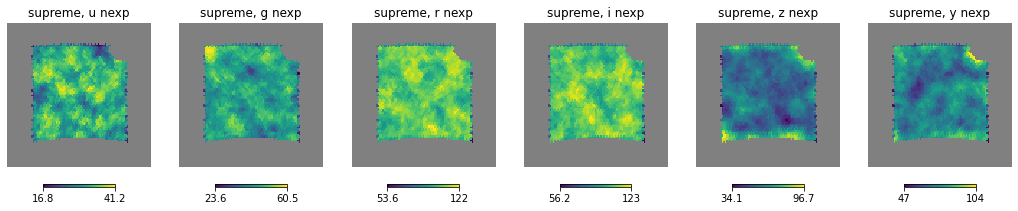

In [19]:
#exposure time, nexposure:
savedir='/global/cscratch1/sd/qhang/minion_1016/MAF-5year/supreme_map/'

band_list=['u','g','r','i','z','y']

fig,axarr=plt.subplots(1,len(band_list), figsize=[18,4])

for ii, bb in enumerate(band_list):
    
    nexp_map = hp.read_map(savedir + 'supreme_dc2_dr6d_v3_%s_nexp_sum-nside-128.fits'%bb)
    
    plt.sca(axarr[ii])
    title='supreme, %s nexp'%bb
    hp.gnomview(nexp_map, rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, nest=False,
                #max=1.47, min=1.02,
                title=title, hold=True, 
                notext=True)


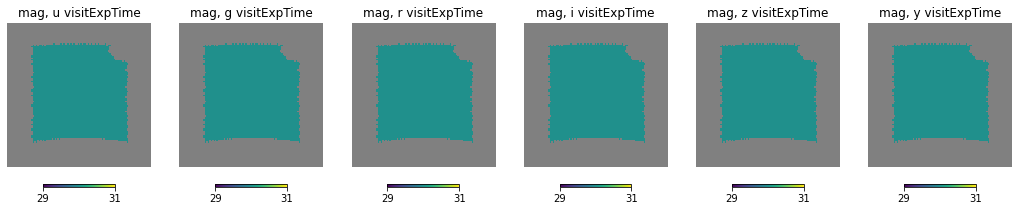

In [21]:
savedir='/global/cscratch1/sd/qhang/minion_1016/MAF-5year/desc_maf/'

band_list=['u','g','r','i','z','y']

fig,axarr=plt.subplots(1,len(band_list), figsize=[18,4])

for ii, bb in enumerate(band_list):
    
    nexp_map = hp.read_map(savedir + 'minion_1016_dc2_Median_visitExpTime_%s_and_nightlt1825_HEAL.fits'%bb)
    
    plt.sca(axarr[ii])
    title='mag, %s visitExpTime'%bb
    hp.gnomview(nexp_map, rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, nest=False,
                #max=1.47, min=1.02,
                title=title, hold=True, 
                notext=True)
